In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/IT350-PROJECT

/content/drive/.shortcut-targets-by-id/1EXQhBNQ9WdJTPdtMcBPWxwP7Xkj-o-6O/IT350-PROJECT


In [ ]:
|!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-70b115b6-46e4-6efc-5969-9ba00c95bd79)


In [ ]:
import pandas as pd

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.4 MB/s 
     |████████████████████████████████| 77 kB 3.9 MB/s 
     |████████████████████████████████| 596 kB 26.2 MB/s 
     |████████████████████████████████| 6.6 MB 29.4 MB/s 
     |████████████████████████████████| 895 kB 37.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np

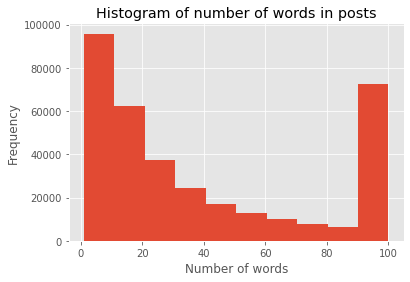

In [ ]:
lengths = []

dataset = pd.read_csv('noaug_new.csv')
dataset = dataset.groupby('Label').head(250000)


for i in dataset["Text"]:
  lengths.append(len(i.split()))

from matplotlib import pyplot as plt

plt.style.use('ggplot')

plt.hist(lengths, 10)

plt.title("Histogram of number of words in posts")
plt.ylabel("Frequency")
plt.xlabel("Number of words")
plt.show()

In [ ]:
# text = []

# dataset = pd.read_csv('noaug_new.csv')
# dataset = dataset[dataset['Text'].notna()]
# dataset = dataset[dataset['Label'].notna()]
# dataset = dataset.groupby('Label').head(200000)

# for index, row in dataset.iterrows():
#   text.append(str(row['Text']))

# labels=dataset['Label']

# labels = np.array(list(map(lambda x: 1 if x=="pos" else 0, labels)))

In [ ]:
textTrain = []

dataset = pd.read_csv('aug_train_new.csv')
dataset = dataset[dataset['Text'].notna()]
dataset = dataset[dataset['Label'].notna()]

for index, row in dataset.iterrows():
  textTrain.append(str(row['Text']))

labelsTrain = dataset['Label']

labelsTrain = np.array(list(map(lambda x: 1 if x=="pos" else 0, labelsTrain)))

In [ ]:
textVal = []

dataset = pd.read_csv('aug_val_new.csv')
dataset = dataset[dataset['Text'].notna()]
dataset = dataset[dataset['Label'].notna()]

for index, row in dataset.iterrows():
  textVal.append(str(row['Text']))

labelsVal = dataset['Label']

labelsVal = np.array(list(map(lambda x: 1 if x=="pos" else 0, labelsVal)))

In [ ]:
from transformers import AutoTokenizer,TFBertForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
# bert = TFBertModel.from_pretrained('bert-base-cased')
bert = TFBertForSequenceClassification.from_pretrained('bert-base-cased',num_labels=2)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
tokenizer("Tableau can be used for data visualization",
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

{'input_ids': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=
array([[  101, 11389,  3984,  1169,  1129,  1215,  1111,  2233,  5173,
         2734,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [ ]:
print(tokenizer.tokenize("It only made me feel more anxious and depressed and all that awfulness",add_special_tokens=True))

['[CLS]', 'It', 'only', 'made', 'me', 'feel', 'more', 'anxious', 'and', 'depressed', 'and', 'all', 'that', 'awful', '##ness', '[SEP]']


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_rem, y_train, y_rem = train_test_split(text,labels, train_size=0.8, stratify=labels, random_state=42)

In [ ]:
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, stratify=y_rem, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(text,labels, train_size=0.8, stratify=labels, random_state=42)

In [ ]:
x_train = tokenizer(
    textTrain,
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
x_valid = tokenizer(
    textVal,
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
# x_test = tokenizer(
#     X_test,
#     add_special_tokens=True,
#     max_length=100,
#     truncation=True,
#     padding=True, 
#     return_tensors='tf',
#     return_token_type_ids = False,
#     return_attention_mask = True,
#     verbose = True)

In [ ]:
# x_test['input_ids']

In [ ]:
# input_ids = x_train['input_ids']
# attention_mask = x_train['attention_mask']

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='bert_model/',monitor = 'val_loss',mode = 'min',save_best_only=True)]

bert.summary()

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics. SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers. Adam (learning_rate=2e-5, epsilon=1e-08)
bert.compile(loss=loss, optimizer=optimizer, metrics=[metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = bert.fit(
    x = [x_train['input_ids'],x_train['attention_mask']] ,
    y = labelsTrain,
    validation_data = [[x_valid['input_ids'],x_valid['attention_mask']], labelsVal],
    epochs = 1,
    batch_size = 32,
    callbacks = callbacks
)

8926/8926 [==============================] - ETA: 0s - loss: 0.4515 - accuracy: 0.7832

INFO:tensorflow:Assets written to: bert_model/assets


INFO:tensorflow:Assets written to: bert_model/assets


8926/8926 [==============================] - 11072s 1s/step - loss: 0.4515 - accuracy: 0.7832 - val_loss: 0.7394 - val_accuracy: 0.5919


In [ ]:
#WITHOUT AUGMENTATION

# history = bert.fit(
#     x = [x_train['input_ids'],x_train['attention_mask']] ,
#     y = y_train,
#     validation_data = [[x_valid['input_ids'],x_valid['attention_mask']], y_val],
#     epochs = 1,
#     batch_size = 32,
#     callbacks = callbacks
# )

7415/7415 [==============================] - ETA: 0s - loss: 0.5443 - accuracy: 0.7278

INFO:tensorflow:Assets written to: bert_model/assets


INFO:tensorflow:Assets written to: bert_model/assets


7415/7415 [==============================] - 9614s 1s/step - loss: 0.5443 - accuracy: 0.7278 - val_loss: 0.5195 - val_accuracy: 0.7449


In [ ]:
bert.save_pretrained('M3/')

Reload and predict

In [ ]:
m = TFBertForSequenceClassification.from_pretrained('M1/')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at M1/.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
import numpy as np

tdata = tokenizer("It only made me feel more anxious and depressed and all that awfulness",
add_special_tokens=True,
max_length=100,
truncation=True,
padding=True, 
return_tensors='tf',
return_token_type_ids = False,
return_attention_mask = True,
verbose = True)

result1 = m.predict([tdata['input_ids'],tdata['attention_mask']]).logits
class1 = np.argmax(result1)


In [ ]:
import tensorflow as tf
score = round(tf.nn.softmax(result1, axis=1).numpy()[0][class1]*10, 1)
print(class1)
print(score)

1
7.2


In [ ]:
m.predict([tdata['input_ids'],tdata['attention_mask']])

IGNORE

In [ ]:

saved_model_path = 'Model-Bert-Aug/'

bert.save(saved_model_path, include_optimizer=False)

In [ ]:
export_dir='saved_model/'
tf.saved_model.save(bert, export_dir=export_dir)

In [ ]:
tdata = tokenizer(
  "hello how are you doing",
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
import keras
import tensorflow as tf

In [ ]:
reloaded = keras.models.load_model("Model-2/")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
tdata = tokenizer(
  "hello how are you doing",
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
tdata

In [ ]:
predicted_raw = reloaded(tdata,training=False)

In [ ]:
np.argmax(scores, axis = 1)

In [ ]:
scores = predicted_raw_2.logits


In [ ]:
predicted_raw_2 = bert.predict([x_test['input_ids'],x_test['attention_mask']])

In [ ]:
scores = predicted_raw_2.logits

In [ ]:
scores.shape

In [ ]:
scores[1]

In [ ]:
y_predicted = np.argmax(scores, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predicted))

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_predicted)
print(cm)

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth value')

Using BertModel

In [ ]:
max_len = 100
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(1,activation = 'sigmoid')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [ ]:
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss =BinaryCrossentropy(from_logits = True)
metric = BinaryAccuracy('balanced_accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [ ]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_valid['input_ids'],'attention_mask':x_valid['attention_mask']}, y_valid
    ),
    epochs=1,
    batch_size=32
)

In [ ]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_valid['input_ids'],'attention_mask':x_valid['attention_mask']}, y_valid
    ),
    epochs=1,
    batch_size=32
)

In [ ]:

saved_model_path = 'Model-2/'

model.save(saved_model_path, include_optimizer=False)

In [ ]:
tdata = tokenizer(
  "hello how are you doing",
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

predicted_raw = bert.predict({'input_ids':tdata['input_ids'],'attention_mask':tdata['attention_mask']})

In [ ]:
print(predicted_raw)

In [ ]:
train_history.history.keys()

In [ ]:
pred = []
for i in predicted_raw:
  if(i>0.5):
    pred.append(1)
  else:
    pred.append(0)

pred = np.array(pred)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))